In [1]:
import pandas as pd
import tensorflow as tf

In [ ]:
import zipfile
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [47]:
#listing all the classes
import os
labels=os.listdir('garbage_classification')
print(labels)

['paper', 'green-glass', 'clothes', 'metal', 'cardboard', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes']


In [49]:
#counting total number of classes in each class.
dataset_count = {}
for label in labels:
    label_path = os.path.join('garbage_classification', label)
    count = len(os.listdir(label_path))
    dataset_count[label] = count

print(dataset_count)

{'paper': 1050, 'green-glass': 629, 'clothes': 5325, 'metal': 769, 'cardboard': 891, 'trash': 697, 'biological': 985, 'white-glass': 775, 'battery': 945, 'brown-glass': 607, 'plastic': 865, 'shoes': 1977}


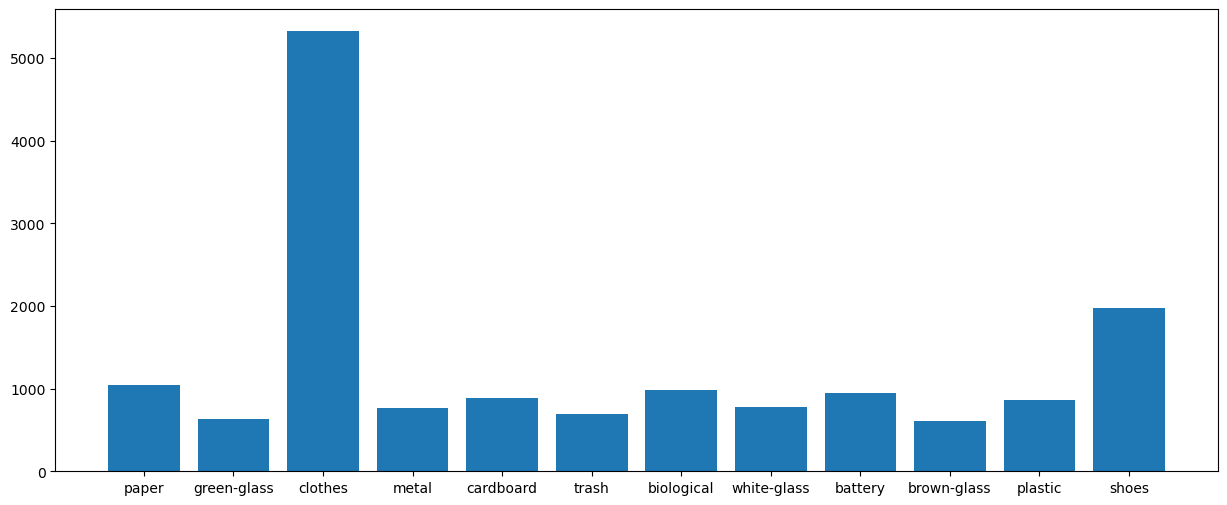

In [51]:
#representing in a graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar(labels,dataset_count.values())
plt.show()

In [49]:
import os
# making train and test directory
os.makedirs('dataset', exist_ok=True)
train_dir = os.path.join('dataset', "train")
test_dir = os.path.join('dataset', "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [51]:
#splittting the dataset into 80:20 ratio
import shutil
import random
for label in os.listdir('garbage_classification'):
    label_path = os.path.join('garbage_classification', label)
    if os.path.isdir(label_path):
        os.makedirs(os.path.join(train_dir, label), exist_ok=True) # creating directories of each class train
        os.makedirs(os.path.join(test_dir, label), exist_ok=True) # creating directories of each class in test
        images = os.listdir(label_path)
        random.shuffle(images)

        #spliting the dataset
        split_idx = int(len(images) * 0.8)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        #copying the images
        for img in train_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(train_dir, label, img))
        for img in test_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(test_dir, label, img))


In [31]:
# setting train and test path
import os
train_path = os.path.join('dataset', "train")
test_path = os.path.join('dataset', "test")
print(train_path)
print(test_path)

dataset/train
dataset/test


In [33]:
#Setting the image height and width
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [35]:
#resizing the images in train directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 51120 files belonging to 12 classes.


In [37]:
train_labels = train_dataset.class_names
train_labels

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [39]:
#counting total number of images in each class.
train_count = {}
for label in train_labels:
    label_path = os.path.join('dataset/train', label)
    count = len(os.listdir(label_path))
    train_count[label] = count

print(train_count)

{'battery': 4260, 'biological': 4260, 'brown-glass': 4260, 'cardboard': 4260, 'clothes': 4260, 'green-glass': 4260, 'metal': 4260, 'paper': 4260, 'plastic': 4260, 'shoes': 4260, 'trash': 4260, 'white-glass': 4260}


In [13]:
#resizing the images in test directory
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 3106 files belonging to 12 classes.


In [15]:
class_names = train_dataset.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [17]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [19]:
#preprocessing the train and test dataset
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [41]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

2025-01-18 18:04:05.551405: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-18 18:04:05.551431: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


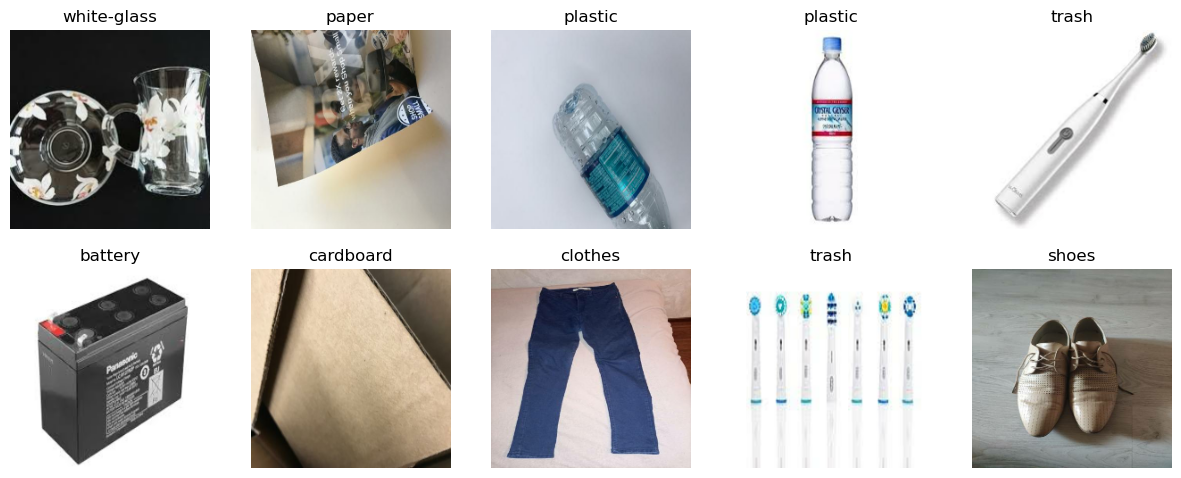

In [61]:
#displaying atleast 10 images after preprocessing and after auto tuning
import matplotlib.pyplot as plt
for images, labels in test_dataset.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(min(10, len(images))):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    plt.show()


In [44]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Need to augment the particular classes and not all classes to balance the data

In [89]:
train_count

{'battery': 4260,
 'biological': 4260,
 'brown-glass': 4260,
 'cardboard': 4260,
 'clothes': 4260,
 'green-glass': 4260,
 'metal': 4260,
 'paper': 4260,
 'plastic': 4260,
 'shoes': 4260,
 'trash': 4260,
 'white-glass': 4260}

In [91]:
# Class Weights
class_weight_dict = {0: 1.3678350970017636, 1: 1.312288494077834, 2: 2.13213058419244, 
                     3: 1.4523642322097379, 4: 0.24274256651017215, 5: 2.0558316766070246, 
                     6: 1.6814363143631437, 7: 1.2310515873015873, 8: 1.494340077071291, 
                     9: 0.6540691545435379, 10: 1.856523040095751, 11: 1.6678763440860216}
print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.3678350970017636, 1: 1.312288494077834, 2: 2.13213058419244, 3: 1.4523642322097379, 4: 0.24274256651017215, 5: 2.0558316766070246, 6: 1.6814363143631437, 7: 1.2310515873015873, 8: 1.494340077071291, 9: 0.6540691545435379, 10: 1.856523040095751, 11: 1.6678763440860216}


In [93]:
#Using lighter version mibilenetv2
from tensorflow.keras.applications import MobileNetV2
base_model = tf.keras.applications.MobileNetV2(alpha=0.5, include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


In [95]:
base_model.trainable = False  # Freeze base model layers

In [97]:
model = tf.keras.Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Flatten(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])



In [99]:
#Gradually reduce the learning rate during training
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.build(input_shape=(BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, 3))  # Batch size can be None

In [103]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_0.50_224            │ (None, 7, 7, 1280)     │       706,224 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 1280)     │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,508 (4.00 MB)

 Trainable params: 336,652 (1.28 MB)

 Non-trainable params: 711,856 (2.72 MB)

In [ ]:
os.makedirs('/content/modes')

In [105]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [113]:
# Checkpoint highest accuracy
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{'modes'}/base_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lowest loss
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{'modes'}/base_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

In [115]:
import time
start_time = time.time()
print('Start Time = ', start_time)
history = model.fit(train_dataset, 
                    epochs=50, 
                    validation_data=test_dataset, 
                    callbacks=[checkpoint_high_acc, checkpoint_low_loss, early_stopping],
                   class_weight=class_weight_dict)
end_time = time.time()
print('End Time =', end_time)

Start Time =  1737205299.800641
Epoch 1/50
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5483 - loss: 2.6602
Epoch 1: val_accuracy improved from -inf to 0.18899, saving model to modes/base_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 12.11111, saving model to modes/base_model_lowest_loss.keras
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 173s 109ms/step - accuracy: 0.5483 - loss: 2.6602 - val_accuracy: 0.1890 - val_loss: 12.1111
Epoch 2/50
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5490 - loss: 2.6381
Epoch 2: val_accuracy improved from 0.18899 to 0.21346, saving model to modes/base_model_highest_accuracy.keras

Epoch 2: val_loss did not improve from 12.11111
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 184s 115ms/step - accuracy: 0.5490 - loss: 2.6381 - val_accuracy: 0.2135 - val_loss: 16.2282
Epoch 3/50
1598/1598 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5551 - loss: 2.6168
Epoch 3: val_accuracy improved from 0.21346 to 0.43561, saving model to modes/b

In [1]:
print('Computational Time =', (end_time - start_time)/3600, 'hours')

NameError: name 'end_time' is not defined

In [119]:
import matplotlib.pyplot as plt

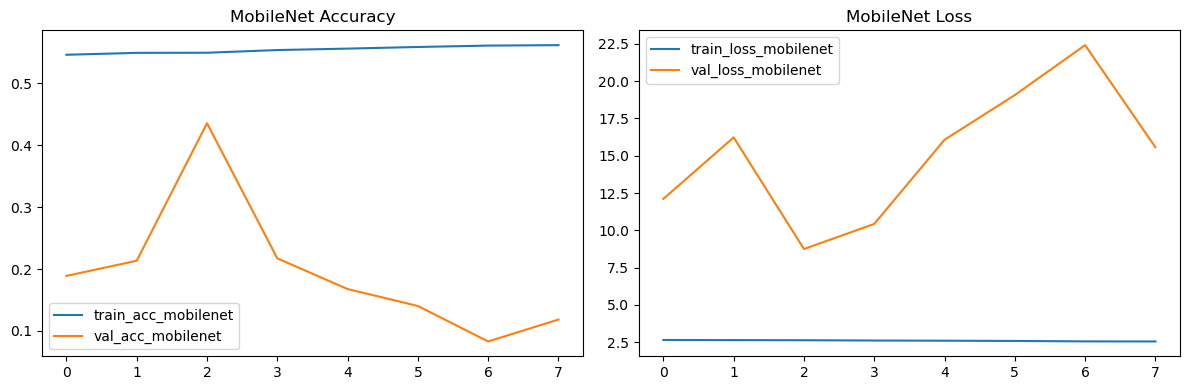

In [121]:
train_acc_mobilenet = history.history["accuracy"]
val_acc_mobilenet = history.history["val_accuracy"]
train_loss_mobilenet = history.history["loss"]
val_loss_mobilenet = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_mobilenet, label="train_acc_mobilenet")
axs[0].plot(val_acc_mobilenet, label="val_acc_mobilenet")
axs[0].set_title("MobileNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_mobilenet, label="train_loss_mobilenet")
axs[1].plot(val_loss_mobilenet, label="val_loss_mobilenet")
axs[1].set_title("MobileNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()